In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from identification import *
from control.matlab import *
import control as ct

plt.style.use('default')

Matheus, você pode gerar o diagrama de Bode de magnitude do modelo identificado (entre y e u), para o compararmos ao diagrama de Bode do modelo do erro do modelo.

In [2]:
df_theta_hat_tempo  = pd.read_csv('../data/theta_hat_2o_emax_tempo.csv', header=None)

In [3]:
theta_hat_tempo = np.array(df_theta_hat_tempo[0], ndmin=2).T

In [4]:
print(theta_hat_tempo)

[[ -0.54870169]
 [ -0.18460901]
 [125.88995968]
 [-73.67583358]]


E(z=e^jw), w = [-pi,pi]

In [5]:
Ts = 0.02048
a1, a2, b1, b2 = theta_hat_tempo[:,0]
num = [b1, b2]
den = [1, a1, a2]
sys_tempo = ct.tf(num,den,Ts)

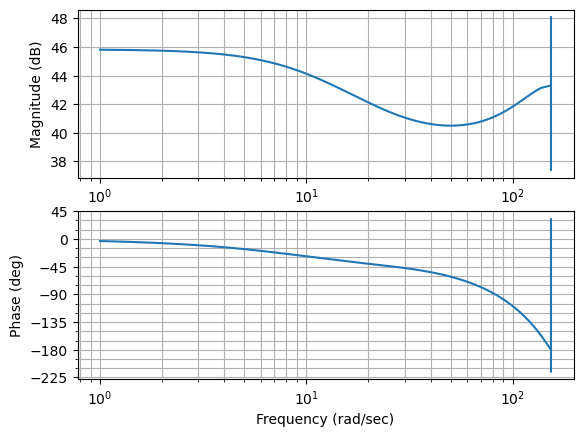

In [6]:
mag_arx_h, phase_arx_h, omega_arx_h = ct.bode(sys_tempo)

In [7]:
df_e_arx_tempo_n11_d = pd.read_csv('../data/e_arx_tempo_n11_d.csv',header=None)
df_data_validation_tempo_n11 = pd.read_csv('../data/entrada_saida_cossenos_emax_tempo_n11_20ms.csv', header=None)

In [8]:
e_arx_tempo_n11_d = np.array(df_e_arx_tempo_n11_d[0],ndmin=2).T

data_tempo_n11 = np.array(df_data_validation_tempo_n11   , ndmin=2)
u_ar_tempo_n11 = np.array(df_data_validation_tempo_n11[0], ndmin=2).T
y_ar_tempo_n11 = np.array(df_data_validation_tempo_n11[1], ndmin=2).T

In [9]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [10]:
nz = number_of_zeros(y_ar_tempo_n11)
u_ar_tempo_n11 = u_ar_tempo_n11[nz-1:]
y_ar_tempo_n11 = y_ar_tempo_n11[nz-1:]

In [11]:
nmax = min(u_ar_tempo_n11.size, e_arx_tempo_n11_d.size)

e_arx_tempo_n11_d = e_arx_tempo_n11_d[:nmax]
u_ar_tempo_n11 = u_ar_tempo_n11[:nmax]

In [12]:
print(u_ar_tempo_n11.size == e_arx_tempo_n11_d.size)

True


In [13]:
best_order_tempo_n11 = find_best_ARX_order(u_ar_tempo_n11,e_arx_tempo_n11_d,5,0.15,True)

ARX 1ª ordem V = 1870.8088347090481
ARX 2ª ordem V = 1890.7507089790718
1 é a melhor ordem


In [14]:
Y_e_arx_tempo_n11_d, phi_e_arx_tempo_n11_d = build_Y_phi_ARX(u_ar_tempo_n11,e_arx_tempo_n11_d,best_order_tempo_n11)

theta_hat_e_arx_tempo_n11_d = calcular_theta_min_quad(Y_e_arx_tempo_n11_d, phi_e_arx_tempo_n11_d)

e_hat_arx_tempo_n11_d = estimate_output(y=e_arx_tempo_n11_d,u=u_ar_tempo_n11,theta=theta_hat_e_arx_tempo_n11_d,ord=best_order_tempo_n11)

In [15]:
print(theta_hat_e_arx_tempo_n11_d.T)

[[-0.80215404 -0.26929272]]


In [16]:
Ts = 0.02048
a1, b1 = theta_hat_e_arx_tempo_n11_d[:,0]
num = [b1]
den = [1, a1]
sys_e_arx_tempo_n11_d = ct.tf(num,den,Ts)

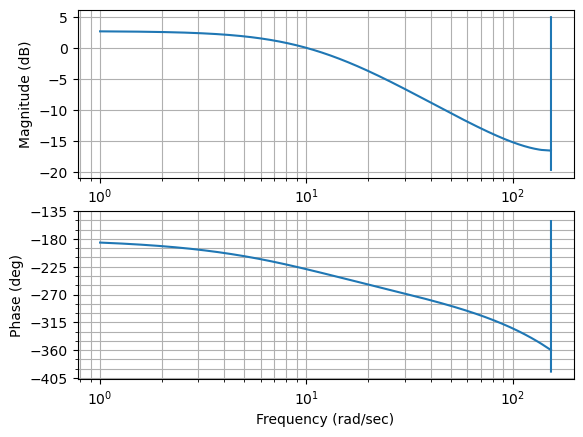

In [17]:
mag_arx_t, phase_arx_t, omega_arx_t = bode(sys_e_arx_tempo_n11_d)

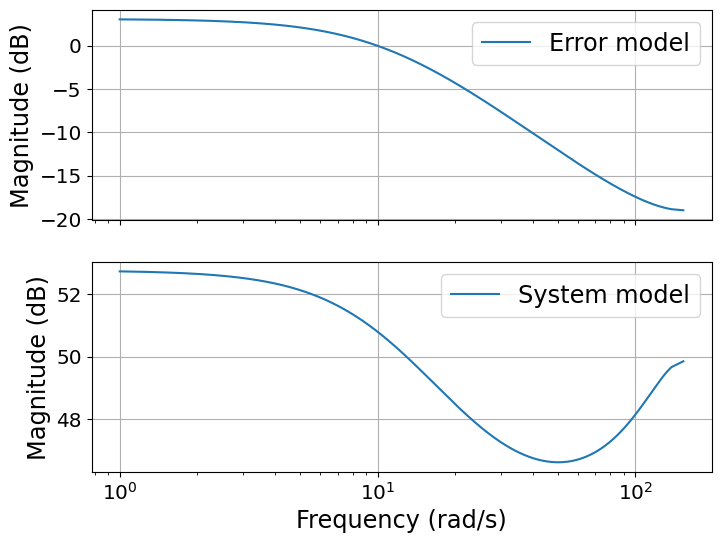

In [23]:
fig, axs = plt.subplots(2, 1, figsize=[8,6], sharex=True)
axs[0].grid(True)
axs[1].grid(True)

#axs[0].xt()
axs[1].set_xlabel('Frequency (rad/s)', fontsize='xx-large')
axs[0].set_ylabel('Magnitude (dB)', fontsize='xx-large')
axs[1].set_ylabel('Magnitude (dB)', fontsize='xx-large')

#plt.xticks(fontsize='x-large')
axs[0].tick_params(labelsize='x-large')
axs[1].tick_params(labelsize='x-large')


axs[0].semilogx(omega_arx_t,10*np.log(mag_arx_t),label='Error model' )
axs[1].semilogx(omega_arx_h,10*np.log(mag_arx_h),label='System model')
axs[0].legend(fontsize='xx-large')
axs[1].legend(fontsize='xx-large')

fig.savefig(fname='../figures/bode_erro_system.png')